In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#drop kolom dengan jumlah null terlalu banyak karena imputasi/pengisian nilai
#pada data yang kosong terlalu banyak berpotensi menghasilkan informasi yang mengandung bias
#drop kolom Cabin yang terlalu banyak mengandung data null
df= df.drop(['PassengerId'], axis=1) # ganti tanda strip dengan nama kolom yang akan di drop

#drop kolom dengan jumlah nilai unik mendekati jumlah baris data,
#karena kolom tersebut tidak berisi informasi berarti
# kecuali kolom Name karena kolom name akan dipreproses untuk mengekstrak info kategori


# drop kolom PassengerId dan tiket
df= df.drop(['Cabin','Ticket'], axis=1) # ganti tanda strip dengan nama kolom yang akan di drop
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [5]:
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
for col in cols:
  print(f'{col}: {df[col].nunique()}')

Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Fare: 248
Embarked: 3


#untuk data kategorik nominal diterapkan metode one hot encoding
#fitur/kolom bertipe ini antara lain adalah data Embarked dan Sex
#tidak ada hubungan ordinal, women dan man tidak menunjukkan hubungan yang satu lebih tinggi dari yang lain
#demikian juga pelabuhan pemberangkatan, tidak ada hubungan urutan terkait ukuran hanya menyatakan tempat yang berbeda saja

In [6]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
#lakukan hal yang sama untuk kolom Embarked
df['Embarked'].unique() #ganti bagian kosong dengn nama kolom

array(['S', 'C', 'Q', nan], dtype=object)

ada nilai nan pada data embark. sebelum melakukan encoding, terlebih dahulu dilakukan pengisian nilai atau drop baris

In [8]:
# cek nilai untuk imputasi kolom Embarked
imputation_dict = df[["Embarked"]].mode().iloc[0].to_dict()
imputation_dict

{'Embarked': 'S'}

In [9]:
#isi nilai kosong pada Embarked dan cek apakah sudah terisi
df["Embarked"].fillna('S', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


/tmp/ipykernel_30/192347327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna('S', inplace=True)


perbedaan apa yang anda lihat dari penggunaan drop_first?

In [10]:
#menggunakan one hot encoding untuk preprocessing data kategorik nominal
df_ohe = pd.get_dummies(df[['Sex','Embarked']])
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_female  891 non-null    bool 
 1   Sex_male    891 non-null    bool 
 2   Embarked_C  891 non-null    bool 
 3   Embarked_Q  891 non-null    bool 
 4   Embarked_S  891 non-null    bool 
dtypes: bool(5)
memory usage: 4.5 KB


In [11]:
# get dummies k-1
# di pandas dilakukan dengan menambahkan parameter drop_first=True
df_ohe_kmin1 = pd.get_dummies(df[['Sex','Embarked']],drop_first=True)
df_ohe_kmin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_male    891 non-null    bool 
 1   Embarked_Q  891 non-null    bool 
 2   Embarked_S  891 non-null    bool 
dtypes: bool(3)
memory usage: 2.7 KB


In [12]:
#gabungkan data df dengan data df_ohe_kmin1 menggunakan fungsi concat /penggabungan kolom
df_1 = pd.concat([df_ohe, df_ohe_kmin1]) #isi dengan dataframe yang akan digabungkan
# cek dengan fungsi info untuk memastikan hasil 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Pemrosesan Data Numerik kolom Age merupakan data numerik, namun pada banyak kasus Age lebih bermakna jika dinyatakan sebagai rentang umur. perlu dilakukan ubah data Age menjadi kategori umur.salah satu metode yang dapat dilakukan adalah binning/binarisasi. selain kolom Age, kolom bertipe numerik adalah kolom Fare. kita akan menerapkan diskritisasi equal width dan equal frequency

In [13]:
#melakukan fill na dengan median dari kolom yang akan diimputasi
df['Age'] = df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


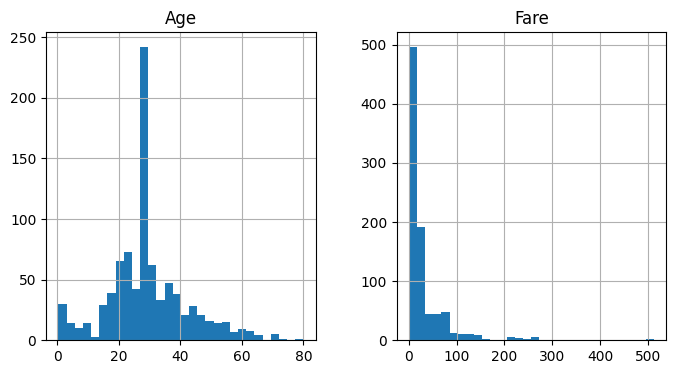

In [14]:
df[['Age', 'Fare']].hist(bins=30, figsize=(8,4))
plt.show()

In [15]:
# untuk data tidak terdistribusi normal bisa dicoba beberapa alternatif ya
# 1. di transformasi log kemudian di diskritisasi
# 2. di diskritisasi saja tanpa log transform
# gunakan sebagai prediktor untuk dua model dan cek bagaimana pengaruhnya terhadap kinerja model

In [16]:
labels = ['bin_' + str(i) for i in range(1, 9)]
labels

['bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8']

In [17]:
df['Age_disc_labels'], bins = pd.cut(
    x=df['Age'], bins=8, labels=labels, retbins=True, precision=0, include_lowest=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_disc_labels
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,bin_3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,bin_4
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,bin_3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,bin_4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,bin_4


In [18]:
df['Age_disc'] = pd.cut(
    x=df['Age'], bins=8, precision=0, include_lowest=True)

Text(0, 0.5, 'Number of observations per bin')

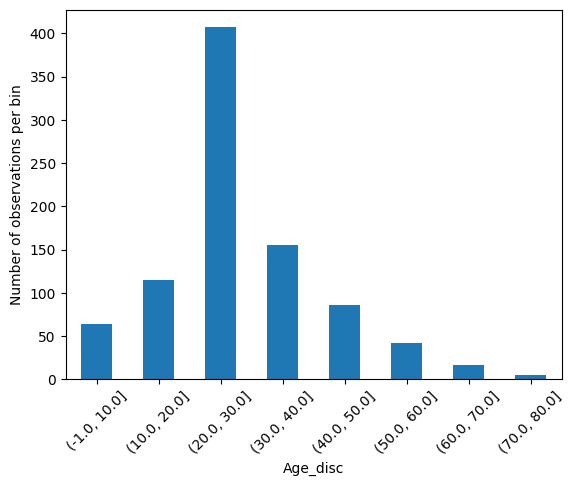

In [19]:
# visualisasikan jumlah data per bin
df.groupby('Age_disc', observed=False)['Age'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [20]:
Age_disccretised, intervals = pd.qcut(
    df['Age'], 10, labels=None, retbins=True, precision=3, duplicates='drop')
df['Age_disc_ef'] = pd.cut(x = df['Age'], bins=intervals) # menggunakan interval pada hasil qcut


Text(0, 0.5, 'Number of observations per bin')

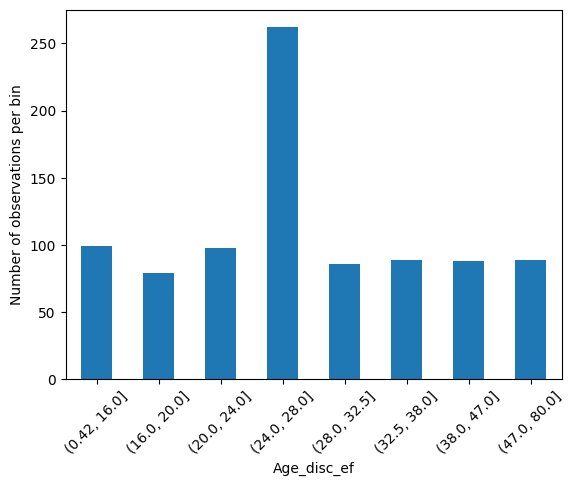

In [21]:
# visualisasikan jumlah data per bin
df.groupby('Age_disc_ef', observed=False)['Age'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

In [22]:
#menggunakan one hot encoding untuk preprocessing data kategorik nominal
df_ohe = pd.get_dummies(df[['Sex','Embarked']])
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_female  891 non-null    bool 
 1   Sex_male    891 non-null    bool 
 2   Embarked_C  891 non-null    bool 
 3   Embarked_Q  891 non-null    bool 
 4   Embarked_S  891 non-null    bool 
dtypes: bool(5)
memory usage: 4.5 KB


In [23]:
# get dummies k-1
# di pandas dilakukan dengan menambahkan parameter drop_first=True
df_ohe_kmin1 = pd.get_dummies(df[['Sex','Embarked']],drop_first=True)
df_ohe_kmin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sex_male    891 non-null    bool 
 1   Embarked_Q  891 non-null    bool 
 2   Embarked_S  891 non-null    bool 
dtypes: bool(3)
memory usage: 2.7 KB


In [24]:
#gabungkan data df dengan data df_ohe_kmin1 menggunakan fungsi concat /penggabungan kolom
df = pd.concat([df_ohe, df_ohe_kmin1]) #isi dengan dataframe yang akan digabungkan
# cek dengan fungsi info untuk memastikan hasil 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sex_female  891 non-null    object
 1   Sex_male    1782 non-null   bool  
 2   Embarked_C  891 non-null    object
 3   Embarked_Q  1782 non-null   bool  
 4   Embarked_S  1782 non-null   bool  
dtypes: bool(3), object(2)
memory usage: 47.0+ KB
